<div class="alert alert-block alert-info">
    <h1> Spark Funds Investment Analysis (EDA) </h1>
</div>

<img src="https://www.imlaak.com/wp-content/uploads/2017/09/Investment-analysis.png">

## Table of Contents

1. [Problem Statement](#section1)
2. [Data Description](#section2)
3. [Checkpoint 1: Data Cleaning 1](#section3)<br>
     3.1 [How many unique companies are present in companies?](#section301)<br>
     3.2 [How many unique companies are present in rounds2?](#section302)<br>
     3.3 [How many observations are present in master_frame?](#section303)<br>
     3.4 [Are there any companies in the rounds2 file which are not present in companies?](#section304)<br>
4. [Data Cleaning and Manipulation](#section4)<br>
     4.1 [Inspecting Null Values](#section401)<br>
     4.2 [Dropping unnecessary Columns](#section402)<br>
     4.3 [Dropping unnecessary rows](#section403)<br> 
5. [Checkpoint 2: Funding Type Analysis](#section5)<br>
     5.1 [Finding most representative value of the investment amount](#section501)<br>
     5.2 [Which investment type is the most suitable for Spark Funds?](#section502)<br>
6. [Checkpoint 3: Country Analysis](#section6)<br>
     6.1 [Top nine countries which have received the highest total funding](#section601)<br>
     6.2 [Identify the top three English-speaking countries in the data frame top9](#section602)<br>  
7. [Checkpoint 4: Sector Analysis 1](#section7)<br>
     7.1 [Extract the primary sector](#section701)<br>
     7.2 [Map each primary sector to one of the eight main sectors](#section702)<br> 
8. [Checkpoint 5: Sector Analysis 2](#section8)<br>  8.1 [Create three separate data frames D1, D2 and D3 for each of the three countries](#section801)<br>
     8.2 [Total number of investments (count)](#section802)<br>
     8.3 [Total amount of investment (USD](#section803)<br>
     8.4 [Top sectors (based on count of investments)](#section804)<br>  8.5 [Which company received the highest investment?](#section805)<br>
9. [Checkpoint 6: Plots](#section9)<br>  9.1 [Plot 1](#section901)<br>
     9.2 [Plot 2](#section902)<br>
     9.3 [Plot 3](#section903)<br>
10. [Conclusion](#section10)<br> 

<a id=section1></a>
## 1. Problem Statement

### Project Brief

You work for `Spark Funds`, an asset management company. __Spark Funds__ wants to make __investments__ in a few companies. The `CEO of Spark Funds` wants to __understand the global trends in investments__ so that she can take the investment decisions effectively.


### Business and Data Understanding

- It wants to invest between __5 to 15 million USD__ per round of investment
- It wants to invest only in __English-speaking countries__ because of the ease of communication with the companies it would invest in


### Business Objective

The objective is to identify the `best sectors`, `countries`, and a `suitable investment type` for making investments. The __overall strategy__ is to __invest where others are investing__, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.


### Goals of data analysis

The goal of the analysis is to perform analysis on three areas:
- Investment type analysis
- Country analysis
- Sector analysis

<a id=section2></a>
## 2. Data Description

There will be 3 sets of datasets provided for the analysis:
1. Company details (companies): Contains with basic data of companies
2. Funding round details (rounds2): Contains information with all the investement funding details
3. Sector Classification (mapping) : Contains numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names

#### Importing Packages

In [1]:
#Importing Packages
import numpy as np                                  # Implements milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

<a id=section3></a>
## 3. Checkpoint 1: Data Cleaning 1

#### Importing the Dataset

In [3]:
#Importing dataset and using correct encoding
companies=pd.read_csv('companies.csv',encoding='palmos')
rounds2=pd.read_csv('rounds2.csv',encoding='palmos')

In [4]:
companies.head()        #Checking the top 5 records in the companies dataset

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()         #Checking the top 5 records in the Rounds dataset

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


As we can see permalink is having different cases in the above datasets, so it needs to be fixed before merging the datasets

In [6]:
companies.shape  #Checking companies shape

(66368, 10)

In [7]:
companies.info()  #Checking Companies Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
rounds2.shape   #Checking Rounds2 shape

(114949, 6)

In [9]:
rounds2.info()  #Checking Rounds2 Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


<a id=section301></a>
### 3.1 How many unique companies are present in companies?

In [10]:
#Making Permalink uppercase in companies dataframe
companies['permalink']=companies['permalink'].apply(lambda x:x.upper())

In [11]:
companies.permalink.head()   #Checking top 5 permalink records

0                    /ORGANIZATION/-FAME
1                 /ORGANIZATION/-QOUNTER
2    /ORGANIZATION/-THE-ONE-OF-THEM-INC-
3                  /ORGANIZATION/0-6-COM
4         /ORGANIZATION/004-TECHNOLOGIES
Name: permalink, dtype: object

In [12]:
print ('Number of unique companies in companies: ', companies.permalink.nunique())

Number of unique companies in companies:  66368


<a id=section302></a>
### 3.2 How many unique companies are present in rounds2?

In [13]:
#Making Permalink uppercase in Rounds2 dataframe
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x:x.upper())

In [14]:
rounds2.company_permalink.head()   #Check top 5 company_permalink records

0                    /ORGANIZATION/-FAME
1                 /ORGANIZATION/-QOUNTER
2                 /ORGANIZATION/-QOUNTER
3    /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                  /ORGANIZATION/0-6-COM
Name: company_permalink, dtype: object

In [15]:
print ('Number of unique companies in Rounds2: ',rounds2.company_permalink.nunique())

Number of unique companies in Rounds2:  66368


<a id=section303></a>
### 3.3 How many observations are present in master_frame?

In [16]:
#Merge the Dataframes (Rounds2 and Companies) with left join using common key
master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')

In [17]:
#Number of Observations
print ('Number of Observations in master_frame: ',master_frame.shape)

Number of Observations in master_frame:  (114949, 16)


In [18]:
#Check records in master_frame
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [19]:
master_frame.company_permalink.nunique()  #Confirming unique companies in master_frame

66368

In [20]:
master_frame.info()   #Check master frame info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

<a id=section304></a>
### 3.4 Are there any companies in the rounds2 file which are not present in companies?

In [21]:
#Check if there are conflicting values
master_frame[master_frame.company_permalink != master_frame.permalink]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


__No conflicting values found__

In [22]:
#Checking all companies in Rounds2 file are present in Companies
all_Cmpny_Companies = pd.DataFrame(companies['permalink'].unique())
all_Cmpny_Rounds2 = pd.DataFrame(rounds2['company_permalink'].unique())
print ('Checking all companies in Rounds2 present in Companies: ',all_Cmpny_Companies.equals(all_Cmpny_Rounds2))
print ('Checking all companies in Companies present in Rounds2: ',all_Cmpny_Rounds2.equals(all_Cmpny_Companies))

Checking all companies in Rounds2 present in Companies:  True
Checking all companies in Companies present in Rounds2:  True


__All companies present in Round2 are present in companies__

<a id=section4></a>
## 4. Data Cleaning and Manipulation

In [23]:
master_frame.columns  #Check columns for master_frame

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

<a id=section401></a>
### 4.1 Inspecting Null Values

In [24]:
#Check for null values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [25]:
#Checking Percentage of missing records
(master_frame.isnull().sum()/master_frame.shape[0])*100

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
dtype: float64

Text(0.5, 1.0, 'Missing Attributes Percentage')

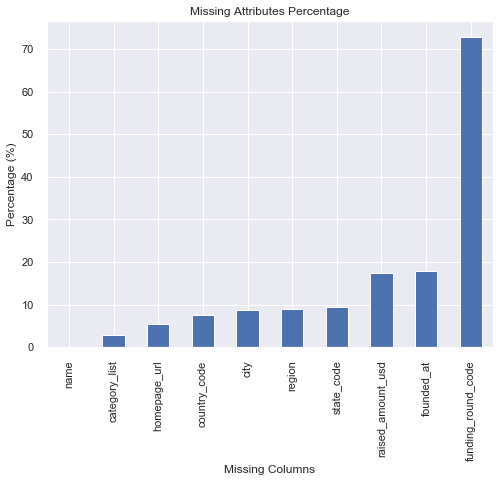

In [26]:
# Find Missing Values in master_frame Dataset for Categorical Columns*/
plt.figure(figsize=(8,6))
missing=(master_frame.isnull().sum()/master_frame.shape[0])*100
missing= missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.ylabel('Percentage (%)')
plt.xlabel('Missing Columns')
plt.title("Missing Attributes Percentage")

- __funding_round_code__ can be removed as it has `72%` of the missing values
- __permalink__ is a redundant field to __company_permalink__
- __state_code, region, city__ can be removed as only country_code is important for our analysis
- Fields __funded_at, founded_at__ are date fields and __homepage_url__ is unique url and will not add any value to our analysis related to sector, country and funding type



In [27]:
#Checking missing records for missing country code
master_frame[master_frame.country_code.isnull()].isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         7125
funded_at                     0
raised_amount_usd          2827
permalink                     0
name                          0
homepage_url               1582
category_list              1671
status                        0
country_code               8678
state_code                 8678
region                     8678
city                       8678
founded_at                 3713
dtype: int64

- __All missing country code have missing state_code, region and city so we cannot use these fields to impute country_code__


<a id=section402></a>
### 4.2 Dropping unnecessary Columns

- As Spark Funds are interested in Funding type, Country and Primary Sector, other unnecessary and redundant fields can be dropped from our analyis. 

In [28]:
#Create copy of master_frame before dropping columns
master_frame_cp=master_frame.copy()

In [29]:
master_frame.shape #Check master_frame before dropping columns

(114949, 16)

In [30]:
#Creating list of columns to be dropped
cols_drop=['funding_round_permalink','funding_round_code','funded_at','homepage_url','permalink','state_code','region','city','founded_at']

In [31]:
#Dropping list of unnecessary columns
master_frame = master_frame.drop(cols_drop,axis=1) 

In [32]:
#Check null values
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
name                      1
category_list          3410
status                    0
country_code           8678
dtype: int64

<a id=section403></a>
### 4.3 Dropping unnecessary rows

- A closed fund is a fund that is closed to investors, either temporarily or permanently. Funds can close for various reasons, but primarily they close because the investment advisor has determined that the fund's asset base is getting too large to effectively execute its investing style. We decide to __not drop the Closed Funds__ as we are still interested to __observe the trend of Investment__ including Closed investments which Spark Funds would be interested in.


- As we still have many null rows in our dataset for following columns
        - raised_amount_usd
        - category_list
        - country_code
  
As our future analysis heavily depend on the above columns, Imputing might result to biased analysis so lets drop rows with null values for now.

In [33]:
#Check master_frame shape
master_frame.shape

(114949, 7)

In [34]:
#Drop rows with null values
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['category_list'].isnull() | 
                            master_frame['country_code'].isnull())]

In [35]:
#Check master_frame shape after drop
master_frame.shape

(88529, 7)

In [36]:
print (round((master_frame.shape[0]/114949)*100,2),'% records were retained')

77.02 % records were retained


In [37]:
#Inspect again if there are any null values
master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  1
category_list         0
status                0
country_code          0
dtype: int64

We will ignore one missing value in __name__ column for now and continue with our analysis

<a id=section5></a>
## 5. Checkpoint 2: Funding Type Analysis

In [38]:
#Check Describe
master_frame.describe(include='all')

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
count,88529,88529,8.852900e+04,88528,88529,88529,88529
unique,48730,14,NaN,48599,21317,4,134
top,/ORGANIZATION/SOLARFLARE,venture,NaN,Solarflare Communications,Biotechnology,operating,USA
freq,19,47809,NaN,19,7621,69041,61692
mean,NaN,NaN,1.047385e+07,NaN,NaN,NaN,NaN
std,NaN,NaN,1.118118e+08,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.705180e+05,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.800000e+06,NaN,NaN,NaN,NaN
75%,NaN,NaN,7.100000e+06,NaN,NaN,NaN,NaN


In [39]:
#Check unique funding type
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [40]:
#Choosing the funding types (venture, angel, seed, and private equity)
funding = ['venture','seed','angel','private_equity']
master_frame_funding=master_frame[master_frame['funding_round_type'].isin(funding)] #Create new dataframe with 4 funding type


In [41]:
master_frame_funding.shape  #Check shape of new dataframe

(75124, 7)

In [42]:
#Percentage of records filtered for 4 funding type
print (round((master_frame_funding.shape[0]/master_frame.shape[0])*100,2),'% records were filtered for 4 funding type')

84.86 % records were filtered for 4 funding type


<a id=section501></a>
### 5.1 Finding most representative value of the investment amount 

In [43]:
#Checking the distribution for each Funding Type
for i in funding:
    print('Funding:',i,master_frame_funding[master_frame_funding.funding_round_type==i].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),'\n')
    print('---------------------------------------------------------')    

Funding: venture        raised_amount_usd
count       4.780900e+04
mean        1.172422e+07
std         8.821571e+07
min         0.000000e+00
10%         5.000000e+05
20%         1.200000e+06
30%         2.020611e+06
40%         3.359284e+06
50%         5.000000e+06
60%         7.000000e+06
70%         1.000000e+07
80%         1.500000e+07
90%         2.500000e+07
100%        1.760000e+10
max         1.760000e+10 

---------------------------------------------------------
Funding: seed        raised_amount_usd
count       2.109500e+04
mean        7.477937e+05
std         2.288318e+06
min         0.000000e+00
10%         2.500000e+04
20%         5.000000e+04
30%         1.000000e+05
40%         1.773008e+05
50%         3.000000e+05
60%         5.000000e+05
70%         8.000000e+05
80%         1.200000e+06
90%         2.000000e+06
100%        2.000000e+08
max         2.000000e+08 

---------------------------------------------------------
Funding: angel        raised_amount_usd
count    

- __The mean looks right skewed compared the median which is an indicator that the data has outliers__
- __There is sharp jump from 90% to 100%__

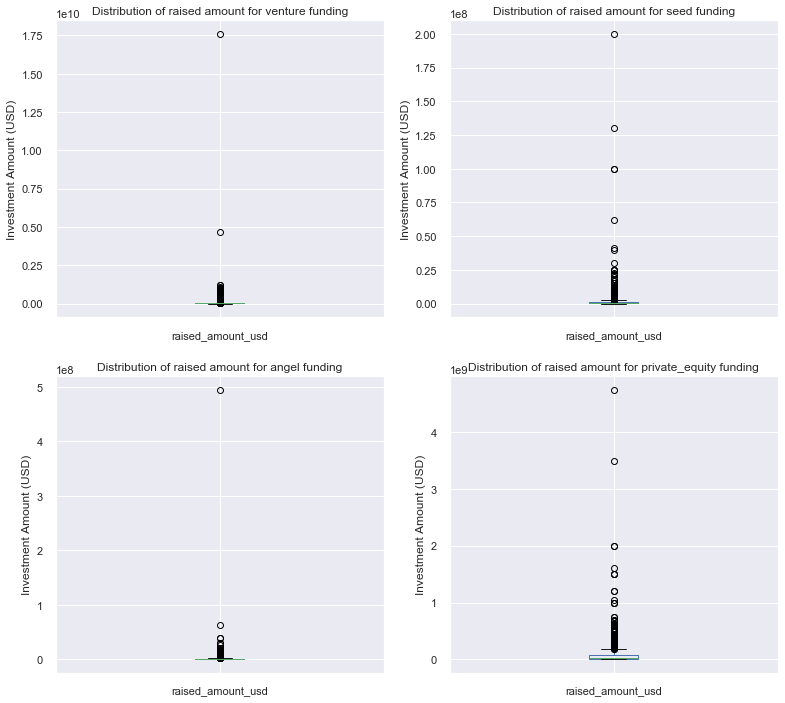

In [44]:
#plotting distribution plots for each funding type
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
master_frame[master_frame['funding_round_type']=='venture']['raised_amount_usd'].plot.box()
plt.ylabel('Investment Amount (USD)')
plt.title('Distribution of raised amount for venture funding')
plt.subplot(2,3,2)
master_frame[master_frame['funding_round_type']=='seed']['raised_amount_usd'].plot.box()
plt.ylabel('Investment Amount (USD)')
plt.title('Distribution of raised amount for seed funding')
plt.subplot(2,3,4)
master_frame[master_frame['funding_round_type']=='angel']['raised_amount_usd'].plot.box()
plt.ylabel('Investment Amount (USD)')
plt.title('Distribution of raised amount for angel funding')
plt.subplot(2,3,5)
master_frame[master_frame['funding_round_type']=='private_equity']['raised_amount_usd'].plot.box()
plt.ylabel('Investment Amount (USD)')
plt.title('Distribution of raised amount for private_equity funding')
plt.show()


__Based on the box plots there seems to be a lot of outliers in each funding type__

In [45]:
#Calculate Average (Mean) amount per Funding Type
master_frame_funding.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64

In [46]:
#Calculate Median amount per Funding Type
master_frame_funding.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

- Both Mean and Median results in __"Venture"__ as the __suitable investment funding type__ ___(ranging between 5M- 15M USD)___ 
- __Median is the best representative value when there are outliers in the data__

<a id=section502></a>
### 5.2 Which investment type is the most suitable for Spark Funds?

In [47]:

#Create a Fund Groups with below range
# '5M-15M','<5M','>15M'
master_frame_funding['fund_grp']=master_frame_funding['raised_amount_usd'].apply(lambda x: '5M-15M' 
                                    if (x>=5000000.0 and x<=15000000.0 ) else ('<5M' if x<5000000.0 else '>15M'))


In [48]:
master_frame_funding[['raised_amount_usd','fund_grp']] #Check whether the above logic is working fine or not

,raised_amount_usd,fund_grp
0,10000000.0,5M-15M
2,700000.0,<5M
4,2000000.0,<5M
7,43360.0,<5M
8,719491.0,<5M
...,...,...
114941,1587301.0,<5M
114942,7000.0,<5M
114943,33149.0,<5M
114945,32842.0,<5M


In [49]:
master_frame_funding.fund_grp.value_counts() #Check number of investments for each Fund group

<5M       48793
5M-15M    16428
>15M       9903
Name: fund_grp, dtype: int64

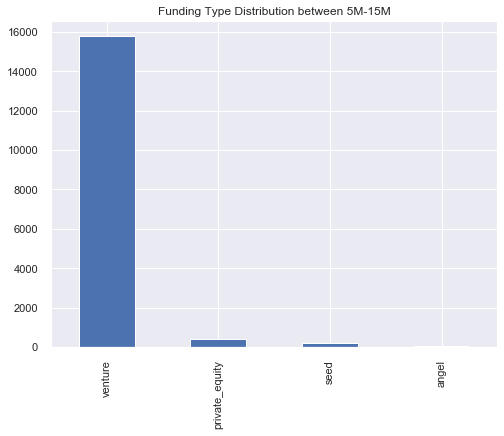

In [50]:
#Plot barplot to check the distribution of Funding type between 5M-15M
plt.figure(figsize=(8,6))
master_frame_funding[master_frame_funding.fund_grp=='5M-15M']['funding_round_type'].value_counts().plot.bar()
plt.title('Funding Type Distribution between 5M-15M')
plt.show()

Most Funding are happening under __Venture__ for the investment ranging between __5M - 15M USD__

In [51]:
master_frame_funding.groupby(['fund_grp','funding_round_type'])['company_permalink'].count()

fund_grp  funding_round_type
5M-15M    angel                    68
          private_equity          402
          seed                    187
          venture               15771
<5M       angel                  4317
          private_equity          424
          seed                  20888
          venture               23164
>15M      angel                    15
          private_equity          994
          seed                     20
          venture                8874
Name: company_permalink, dtype: int64

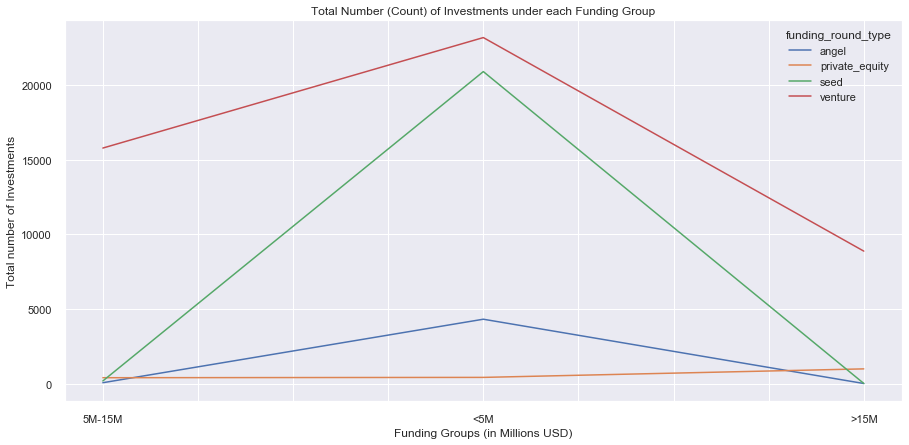

In [52]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
master_frame_funding.groupby(['fund_grp','funding_round_type']).count()['company_permalink'].unstack().plot(ax=ax)
plt.ylabel('Total number of Investments')
plt.xlabel('Funding Groups (in Millions USD)')
plt.title('Total Number (Count) of Investments under each Funding Group')
plt.show()

Based on the median values and distribution of different funding type for different fund group __"venture type" funding__ is most suitable investment for __Spark Funds__ who wants to invest between __5M to 15M USD__ per round of investment.

<a id=section6></a>
## 6. Checkpoint 3: Country Analysis

In [53]:
#Choosing venture Type Funding for further analysis
master_frame_venture=master_frame[master_frame['funding_round_type']=='venture']

In [54]:
master_frame_venture.shape #Check shape

(47809, 7)

In [55]:
#Convert amount from USD to Million USD for better readability
master_frame_venture['raised_amount_usd'] = master_frame_venture['raised_amount_usd']/1000000

In [56]:
master_frame_venture.head()  #Check top records

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,venture,10.000000,#fame,Media,operating,IND
4,/ORGANIZATION/0-6-COM,venture,2.000000,0-6.com,Curated Web,operating,CHN
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/ORGANIZATION/0XDATA,venture,20.000000,H2O.ai,Analytics,operating,USA
11,/ORGANIZATION/0XDATA,venture,1.700000,H2O.ai,Analytics,operating,USA


<a id=section601></a>
### 6.1 Top nine countries which have received the highest total funding

In [57]:
#top nine countries which have received the highest total funding
master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    420068.029342
CHN     39338.918773
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
FRA      7226.851352
ISR      6854.350477
DEU      6306.921981
JPN      3167.647127
Name: raised_amount_usd, dtype: float64

<a id=section602></a>
### 6.2 Identify the top three English-speaking countries in the data frame top9.

In [58]:
#Load english Speaking Countries list with the help of web scraping and creating a .csv file 
english_ctry=pd.read_csv('englishcountries.csv')
english_ctry.head()

,country_Name,country_code
0,Australia,AUS
1,New Zealand,NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda,ATG


In [59]:
# Create a data frame named top9 with the top nine countries
top9=pd.DataFrame(master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9))
top9.reset_index(inplace=True)
top9

,country_code,raised_amount_usd
0,USA,420068.029342
1,CHN,39338.918773
2,GBR,20072.813004
3,IND,14261.508718
4,CAN,9482.217668
5,FRA,7226.851352
6,ISR,6854.350477
7,DEU,6306.921981
8,JPN,3167.647127


In [60]:
#Define a function to return English/Non-English Speaking Flag
def english_speaking(x):
    for i in english_ctry['country_code']:
        if x==i:
            return 'English Speaking'
    return 'Non-English Speaking'

In [61]:
#Apply English Speaking Flag to Top9 dataframe
top9['english_speaking']=top9['country_code'].apply(english_speaking)

In [62]:
top9   #Check the Dataframe

,country_code,raised_amount_usd,english_speaking
0,USA,420068.029342,English Speaking
1,CHN,39338.918773,Non-English Speaking
2,GBR,20072.813004,English Speaking
3,IND,14261.508718,English Speaking
4,CAN,9482.217668,English Speaking
5,FRA,7226.851352,Non-English Speaking
6,ISR,6854.350477,Non-English Speaking
7,DEU,6306.921981,Non-English Speaking
8,JPN,3167.647127,Non-English Speaking


__USA (United States), GBR (United Kingdom) and IND (India)__ are top 3 countries of Interests for Spark Funds

<a id=section7></a>
## 7. Checkpoint 4: Sector Analysis 1

In [63]:
#Checking Sample Category List
master_frame_venture['category_list'].sample(5)

31682                                          Health Care
71725                                     Clean Technology
23934    Cloud Infrastructure|Enterprise Software|Procu...
35733                                  Enterprise Software
48015               Enterprise Software|Project Management
Name: category_list, dtype: object

<a id=section701></a>
### 7.1 Extract the primary sector 

In [64]:
#Extract Primary Sector from Category List
master_frame_venture['primary_sector']=master_frame['category_list'].astype(str).apply(lambda x:x.split('|')[0])

In [65]:
#Checking Primary sector and Category list
master_frame_venture[['category_list','primary_sector']].sample(10)

,category_list,primary_sector
12294,Biotechnology,Biotechnology
11825,Software,Software
22967,Clean Technology,Clean Technology
102771,Hardware + Software|Smart Grid,Hardware + Software
113415,Software,Software
20668,Entertainment|Games|Guides|Jewelry|Television|...,Entertainment
62270,B2B|Big Data|Big Data Analytics|CRM|Enterprise...,B2B
26821,Logistics|Supply Chain Management,Logistics
66190,Biotechnology,Biotechnology
94982,Advertising|Brand Marketing|Optimization,Advertising


<a id=section702></a>
### 7.2 Map each primary sector to one of the eight main sectors

In [66]:
#Load mapping File
mapping=pd.read_csv('mapping.csv')

In [67]:
#Check mapping top records
mapping.head(25)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


Mapping file has issues in Category list as "na" is replaced by "0" and it needs to be corrected. E.g. __"Analytics"__ is written as __"A0lytics"__ / __"Alternative Medicine"__ is written as __"Alter0tive Medicine"__

In [68]:
#Check the issue
mapping[(mapping['category_list']=='A0lytics') | (mapping['category_list']=='0notechnology')]


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
22,A0lytics,0,0,0,0,0,0,0,0,1
471,0notechnology,0,0,1,0,0,0,0,0,0


In [69]:
#Correct mapping file
mapping['category_list']=mapping['category_list'].astype(str).apply(lambda x: x.replace('0','na'))

In [70]:
#Check the issue got corrected
mapping[(mapping['category_list']=='A0lytics') | (mapping['category_list']=='0notechnology')]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [71]:
#Check more issues related to Categories 
mapping[mapping.category_list.str.startswith('Enterprise')]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,Enterprise 2.na,0,0,0,0,0,0,0,1,0
244,Enterprise Application,0,0,0,0,0,0,0,1,0
245,Enterprise Purchasing,0,0,0,0,0,0,0,0,1
246,Enterprise Resource Planning,0,0,0,0,0,0,0,1,0
247,Enterprise Search,0,0,0,0,0,0,1,0,0
248,Enterprise Security,0,0,0,0,0,0,0,1,0
249,Enterprise Software,0,0,0,0,0,0,0,1,0
250,Enterprises,0,0,0,0,0,0,0,1,0


__Enterprise 2.0__ has become __Enterprise 2.na__ which needs to be corrected

In [72]:
#Correct mapping file
mapping['category_list']=mapping['category_list'].astype(str).apply(lambda x: x.replace('2.na','2.0'))

In [73]:
#Check if the issue is fixed
mapping[mapping.category_list.str.startswith('Enterprise')]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,Enterprise 2.0,0,0,0,0,0,0,0,1,0
244,Enterprise Application,0,0,0,0,0,0,0,1,0
245,Enterprise Purchasing,0,0,0,0,0,0,0,0,1
246,Enterprise Resource Planning,0,0,0,0,0,0,0,1,0
247,Enterprise Search,0,0,0,0,0,0,1,0,0
248,Enterprise Security,0,0,0,0,0,0,0,1,0
249,Enterprise Software,0,0,0,0,0,0,0,1,0
250,Enterprises,0,0,0,0,0,0,0,1,0


In [74]:
#Use Melt function to map category list to eight primary sectors
mel = mapping.melt(var_name=['main_sector'], id_vars='category_list') 
mel[mel.value == 1].reset_index(drop=True)

,category_list,main_sector,value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1
...,...,...,...
683,Social Recruiting,"Social, Finance, Analytics, Advertising",1
684,Social Television,"Social, Finance, Analytics, Advertising",1
685,Social Travel,"Social, Finance, Analytics, Advertising",1
686,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [75]:
#Create dataframe with category list and master category
sector_mapping=mel[mel.value == 1].reset_index(drop=True)

In [76]:
#Check sample 10 records
sector_mapping.sample(10)

,category_list,main_sector,value
248,Electronics,Manufacturing,1
641,Lotteries,"Social, Finance, Analytics, Advertising",1
96,Creative Industries,Entertainment,1
591,Cyber,"Social, Finance, Analytics, Advertising",1
82,Casual Games,Entertainment,1
448,Oil & Gas,Others,1
593,Data Center Automation,"Social, Finance, Analytics, Advertising",1
676,Social Games,"Social, Finance, Analytics, Advertising",1
117,Game Mechanics,Entertainment,1
363,Enterprise Resource Planning,Others,1


In [77]:
sector_mapping.main_sector.value_counts() #Check primary sectors and number of categories

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Blanks                                       1
Name: main_sector, dtype: int64

In [78]:
#Clean Sector mapping Dataframe
#Drop value column
sector_mapping=sector_mapping.drop('value',axis=1)

In [79]:
sector_mapping.shape  #Check shape

(688, 2)

In [80]:
#Drop "Blanks" from sector mapping as only primary 8 main sector are required
sector_mapping=sector_mapping[~(sector_mapping.main_sector=='Blanks')]

In [81]:
sector_mapping.shape  #Check shape

(687, 2)

In [82]:
#Convert category list to upper for better matching
sector_mapping['category_list']=sector_mapping['category_list'].apply(lambda x:x.upper())
master_frame_venture['primary_sector']=master_frame_venture['primary_sector'].apply(lambda x:x.upper())

In [83]:
#Merge master_frame with mapping dataframe
master_final=pd.merge(master_frame_venture,sector_mapping,how='left',left_on='primary_sector',right_on='category_list')

In [84]:
master_final.shape

(47809, 10)

In [85]:
master_final.sample(5)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
23594,/ORGANIZATION/LIGHTING-RETROFIT-INTERNATIONAL,venture,4.999929,Lighting Retrofit International,Clean Technology,operating,USA,CLEAN TECHNOLOGY,CLEAN TECHNOLOGY,Cleantech / Semiconductors
32386,/ORGANIZATION/POCKETMATH,venture,10.000000,PocketMath,Mobile|Mobile Advertising|Real Time,operating,USA,MOBILE,MOBILE,"News, Search and Messaging"
44679,/ORGANIZATION/VINDICO-PHARMACEUTICALS,venture,1.285000,Vindico Pharmaceuticals,Pharmaceuticals,operating,USA,PHARMACEUTICALS,PHARMACEUTICALS,Health
1624,/ORGANIZATION/AGITO-NETWORKS,venture,9.000000,Agito Networks,Enterprise Software,acquired,USA,ENTERPRISE SOFTWARE,ENTERPRISE SOFTWARE,Others
17670,/ORGANIZATION/GREEN-GENERATION-SOLUTIONS,venture,2.000000,Green Generation Solutions,Clean Technology,operating,USA,CLEAN TECHNOLOGY,CLEAN TECHNOLOGY,Cleantech / Semiconductors


In [86]:
master_final.isnull().sum() #inspect the null values

company_permalink      0
funding_round_type     0
raised_amount_usd      0
name                   0
category_list_x        0
status                 0
country_code           0
primary_sector         0
category_list_y       13
main_sector           13
dtype: int64

In [87]:
master_final[master_final.main_sector.isnull()]  #Check the records with Null main sector

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
3783,/ORGANIZATION/ASIA-TRANSLATE,venture,0.020000,Asia Translate,English-Speaking|Translation,operating,SGP,ENGLISH-SPEAKING,NaN,NaN
7812,/ORGANIZATION/CARTPAY-CO-,venture,0.050000,CartPay Co.,Enterprise Hardware|Retail,operating,RUS,ENTERPRISE HARDWARE,NaN,NaN
9070,/ORGANIZATION/CLEAN-VEHICLE-SOLUTIONS,venture,0.125000,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,NATURAL GAS USES,NaN,NaN
12521,/ORGANIZATION/DOLORES-SPEECH-PRODUCTS,venture,0.250000,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,ADAPTIVE EQUIPMENT,NaN,NaN
15284,/ORGANIZATION/FIA-FORMULA-E,venture,68.569234,FIA Formula E,Racing,closed,GBR,RACING,NaN,NaN
15578,/ORGANIZATION/FIVE-BELOW,venture,194.000000,Five Below,Specialty Retail,ipo,USA,SPECIALTY RETAIL,NaN,NaN
18452,/ORGANIZATION/HEALTHTELL,venture,9.486929,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,BIOTECHNOLOGY AND SEMICONDUCTOR,NaN,NaN
22070,/ORGANIZATION/JUSTINMIND,venture,0.862000,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,RAPIDLY EXPANDING,NaN,NaN
29589,/ORGANIZATION/OMEGA-POINT-RESEARCH,venture,3.172815,Omega Point Research,Product Search,closed,USA,PRODUCT SEARCH,NaN,NaN
36850,/ORGANIZATION/SENSE-LABS-INC-,venture,2.499999,Sense,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,GREENTECH,NaN,NaN


In [88]:
#List of missing categories
missing_category=master_final[master_final.main_sector.isnull()].primary_sector.unique()
missing_category

array(['ENGLISH-SPEAKING', 'ENTERPRISE HARDWARE', 'NATURAL GAS USES',
       'ADAPTIVE EQUIPMENT', 'RACING', 'SPECIALTY RETAIL',
       'BIOTECHNOLOGY AND SEMICONDUCTOR', 'RAPIDLY EXPANDING',
       'PRODUCT SEARCH', 'GREENTECH', 'RETIREMENT'], dtype=object)

In [89]:
#Confirming if the missing categories belong to mapping file or not
sector_mapping[sector_mapping.category_list.isin(missing_category)]

,category_list,main_sector


__Missing categories dont have a main sector in the mapping file__

In [90]:
master_final.shape  #Check shape

(47809, 10)

In [91]:
#Drop Null main sector from the merged dataframe (master_final) as null main sector wont be useful for further analysis
master_final=master_final[~(master_final.main_sector.isnull())]


In [92]:
#Check Master Final merged Data frame after dropping values
master_final.shape

(47796, 10)

<a id=section8></a>
## 8. Checkpoint 5: Sector Analysis 2

In [93]:
#Create a Fund Group with below range
# '5M-15M','<5M','>15M'
master_final['fund_grp']=master_final['raised_amount_usd'].apply(lambda x: '5M-15M' if (x>=5.0 and x<=15.0 ) else ('<5M' if x<5.0 else '>15M'))


In [94]:
master_final.shape   #Check shape

(47796, 11)

In [95]:
master_final.head()   #Check top records

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,fund_grp
0,/ORGANIZATION/-FAME,venture,10.000000,#fame,Media,operating,IND,MEDIA,MEDIA,Entertainment,5M-15M
1,/ORGANIZATION/0-6-COM,venture,2.000000,0-6.com,Curated Web,operating,CHN,CURATED WEB,CURATED WEB,"News, Search and Messaging",<5M
2,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BIOTECHNOLOGY,BIOTECHNOLOGY,Cleantech / Semiconductors,<5M
3,/ORGANIZATION/0XDATA,venture,20.000000,H2O.ai,Analytics,operating,USA,ANALYTICS,ANALYTICS,"Social, Finance, Analytics, Advertising",>15M
4,/ORGANIZATION/0XDATA,venture,1.700000,H2O.ai,Analytics,operating,USA,ANALYTICS,ANALYTICS,"Social, Finance, Analytics, Advertising",<5M


In [96]:
#Drop category_list_y from master_final as it is redundant
master_final=master_final.drop('category_list_y',axis=1)

In [97]:
master_final.shape   #Check shape

(47796, 10)

In [98]:
master_final.main_sector.value_counts()   #Check overall top main sector with total number of investments

Others                                     11416
Cleantech / Semiconductors                 10055
Social, Finance, Analytics, Advertising     9629
News, Search and Messaging                  5970
Health                                      3958
Manufacturing                               3281
Entertainment                               2752
Automotive & Sports                          735
Name: main_sector, dtype: int64

<a id=section801></a>
### 8.1 Create three separate data frames D1, D2 and D3 for each of the three countries

In [99]:
#Create Dataframe for top 3 English Speaking Countries with Venture Type Funding and 5M-15M raised amount
#Dataframe is already filtered with "Venture" Funding Type 
D1=master_final[(master_final['country_code']=='USA') & (master_final['fund_grp']=='5M-15M')]
D2=master_final[(master_final['country_code']=='GBR') & (master_final['fund_grp']=='5M-15M')]
D3=master_final[(master_final['country_code']=='IND') & (master_final['fund_grp']=='5M-15M')]

In [100]:
#Check observations for D1,D2,D3 Dataframe
print('D1: ',D1.shape)
print('D2: ',D2.shape)
print('D3: ',D3.shape)

D1:  (12063, 10)
D2:  (621, 10)
D3:  (328, 10)


In [101]:
#Add "total_amount" and "total_count" group by main_Sector in D1
D1_count=pd.DataFrame(D1.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'}))
D1_count.reset_index(inplace=True)
D1 = pd.merge(D1,D1_count, how='left', on ='main_sector')
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,fund_grp,Total_amount,Total_count
0,/ORGANIZATION/0XDATA,venture,8.900000,H2O.ai,Analytics,operating,USA,ANALYTICS,"Social, Finance, Analytics, Advertising",5M-15M,23807.376964,2714
1,/ORGANIZATION/1-MAINSTREAM,venture,5.000000,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,APPS,"News, Search and Messaging",5M-15M,13971.567428,1583
2,/ORGANIZATION/128-TECHNOLOGY,venture,11.999347,128 Technology,Service Providers|Technology,operating,USA,SERVICE PROVIDERS,Others,5M-15M,26321.007002,2950
3,/ORGANIZATION/1366-TECHNOLOGIES,venture,15.000000,1366 Technologies,Manufacturing,operating,USA,MANUFACTURING,Manufacturing,5M-15M,7258.553378,799
4,/ORGANIZATION/1366-TECHNOLOGIES,venture,5.000000,1366 Technologies,Manufacturing,operating,USA,MANUFACTURING,Manufacturing,5M-15M,7258.553378,799


In [102]:
#Add "total_amount" and "total_count" group by main_Sector in D2
D2_count=pd.DataFrame(D2.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'}))
D2_count.reset_index(inplace=True)
D2 = pd.merge(D2,D2_count, how='left', on ='main_sector')
D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,fund_grp,Total_amount,Total_count
0,/ORGANIZATION/365SCORES,venture,5.500000,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,ANDROID,"Social, Finance, Analytics, Advertising",5M-15M,1089.404014,133
1,/ORGANIZATION/7DIGITAL,venture,8.468328,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,CONTENT CREATORS,Entertainment,5M-15M,482.784687,56
2,/ORGANIZATION/7DIGITAL,venture,10.000000,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,CONTENT CREATORS,Entertainment,5M-15M,482.784687,56
3,/ORGANIZATION/90MIN,venture,15.000000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,MEDIA,Entertainment,5M-15M,482.784687,56
4,/ORGANIZATION/90MIN,venture,5.800000,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,MEDIA,Entertainment,5M-15M,482.784687,56


In [103]:
#Add "total_amount" and "total_count" group by main_Sector in D3
D3_count=pd.DataFrame(D3.groupby('main_sector')['raised_amount_usd'].agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'}))
D3_count.reset_index(inplace=True)
D3 = pd.merge(D3,D3_count, how='left', on ='main_sector')
D3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,fund_grp,Total_amount,Total_count
0,/ORGANIZATION/-FAME,venture,10.000000,#fame,Media,operating,IND,MEDIA,Entertainment,5M-15M,280.830000,33
1,/ORGANIZATION/21DIAMONDS-INDIA,venture,6.369507,21Diamonds,E-Commerce,operating,IND,E-COMMERCE,Others,5M-15M,1013.409507,110
2,/ORGANIZATION/A-LITTLE-WORLD,venture,6.410000,A LITTLE WORLD,Finance,operating,IND,FINANCE,"Social, Finance, Analytics, Advertising",5M-15M,550.549550,60
3,/ORGANIZATION/ADLABS-IMAGICA,venture,8.180000,Adlabs Imagica,Entertainment|Tourism,operating,IND,ENTERTAINMENT,Entertainment,5M-15M,280.830000,33
4,/ORGANIZATION/AGILE,venture,5.740000,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,FINANCE,"Social, Finance, Analytics, Advertising",5M-15M,550.549550,60


<a id=section802></a>
### 8.2 Total number of investments (count)

In [104]:
#Check total number of investments (counts) for top 3 English Speaking Countries
print('Total Number of investment in USA: ',D1.company_permalink.count())
print('Total Number of investment in GBR: ',D2.company_permalink.count())
print('Total Number of investment in IND: ',D3.company_permalink.count())

Total Number of investment in USA:  12063
Total Number of investment in GBR:  621
Total Number of investment in IND:  328


<a id=section803></a>
### 8.3 Total amount of investment (USD)

In [105]:
#Check total amount of investments(USD) for top 3 English Speaking Countries 
print ('Total Amount invested in USA (USD) : ',D1.raised_amount_usd.sum()*1000000)
print ('Total Amount invested in GBR (USD) : ',D2.raised_amount_usd.sum()*1000000)
print ('Total Amount invested in IND (USD): ',D3.raised_amount_usd.sum()*1000000)

Total Amount invested in USA (USD) :  107757097293.99998
Total Amount invested in GBR (USD) :  5379078691.000001
Total Amount invested in IND (USD):  2949543601.9999995


In [106]:
#Check total amount of investments(in Millions USD) for top 3 English Speaking Countries 
print ('Total Amount invested in USA (in Million USD): ',round(D1.raised_amount_usd.sum(),2))
print ('Total Amount invested in GBR (in Million USD): ',round(D2.raised_amount_usd.sum(),2))
print ('Total Amount invested in IND (in Million USD): ',round(D3.raised_amount_usd.sum(),2))

Total Amount invested in USA (in Million USD):  107757.1
Total Amount invested in GBR (in Million USD):  5379.08
Total Amount invested in IND (in Million USD):  2949.54


<a id=section804></a>
### 8.4 Top sectors (based on count of investments)

In [107]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_count.sort_values(by='Total_count',ascending=False)

,main_sector,Total_amount,Total_count
6,Others,26321.007002,2950
7,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,Cleantech / Semiconductors,21633.430822,2350
5,"News, Search and Messaging",13971.567428,1583
3,Health,8211.859357,909
4,Manufacturing,7258.553378,799
2,Entertainment,5099.197982,591
0,Automotive & Sports,1454.104361,167


In [108]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
D2_count.sort_values(by='Total_count',ascending=False)

,main_sector,Total_amount,Total_count
6,Others,1283.624289,147
7,"Social, Finance, Analytics, Advertising",1089.404014,133
1,Cleantech / Semiconductors,1163.990056,130
5,"News, Search and Messaging",615.746235,73
2,Entertainment,482.784687,56
4,Manufacturing,361.940335,42
3,Health,214.537510,24
0,Automotive & Sports,167.051565,16


In [109]:
#Top sector, second-top, third-top for D3 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
D3_count.sort_values(by='Total_count',ascending=False)

,main_sector,Total_amount,Total_count
6,Others,1013.409507,110
7,"Social, Finance, Analytics, Advertising",550.549550,60
5,"News, Search and Messaging",433.834545,52
2,Entertainment,280.830000,33
4,Manufacturing,200.900000,21
1,Cleantech / Semiconductors,165.380000,20
3,Health,167.740000,19
0,Automotive & Sports,136.900000,13


<a id=section805></a>
### 8.5 Which company received the highest investment?

#### Top Company for first and second highest sector in USA

In [110]:
#Check the top company based on highest count of investment for USA
top_company = D1[D1['main_sector']=='Others']
#Group by company_permalink and aggregate the amount and sort to get the top company
top_company.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
Virtustream    64.3
Name: raised_amount_usd, dtype: float64

In [111]:
#Check the second top company based on highest count of investment for USA
second_company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
#Group by company_permalink and aggregate the amount and sort to get the top company
second_company.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
SST Inc. (Formerly ShotSpotter)    67.933006
Name: raised_amount_usd, dtype: float64

#### Top Company for first and second highest sector in GBR

In [112]:
#Check the top company based on highest count of investment for GBR
top_company = D2[D2['main_sector']=='Others']
#Group by company_permalink and aggregate the amount and sort to get the top company
top_company.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
Electric Cloud    37.0
Name: raised_amount_usd, dtype: float64

In [113]:
#Check the second top company based on highest count of investment for USA
second_company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
#Group by company_permalink and aggregate the amount and sort to get the top company
second_company.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
Celltick Technologies    37.5
Name: raised_amount_usd, dtype: float64

#### Top Company for first and second highest sector in IND

In [114]:
#Check the top company based on highest count of investment for GBR
top_company = D3[D3['main_sector']=='Others']
#Group by company_permalink and aggregate the amount and sort to get the top company
top_company.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
FirstCry.com    39.0
Name: raised_amount_usd, dtype: float64

In [115]:
#Check the second top company based on highest count of investment for USA
second_company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
#Group by company_permalink and aggregate the amount and sort to get the top company
second_company.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)

name
Manthan Systems    50.7
Name: raised_amount_usd, dtype: float64

<a id=section9></a>
## 9. Checkpoint 6: Plots


<a id=section901></a>
### 9.1 Plot 1

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

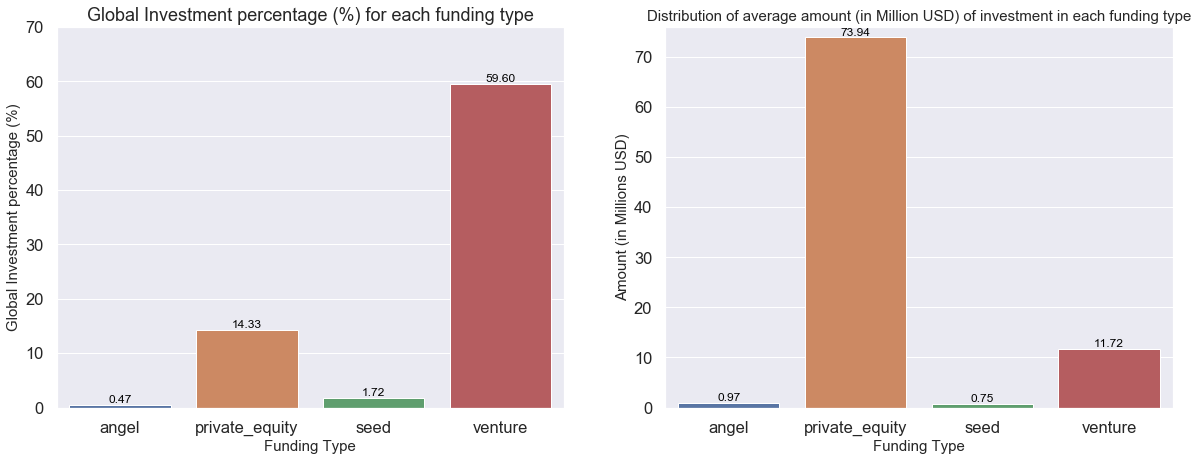

In [116]:
import math
#setting sns style
sns.set(font_scale = 1.5)

#Creating 2 axes
f,ax = plt.subplots(1,2,figsize=(20,7))

#Creating barplot showing the fraction of total investments (globally) in angel, venture, seed, and private equity.
plot_master=pd.DataFrame(master_frame_cp[master_frame_cp.funding_round_type.isin(funding)].groupby('funding_round_type')['raised_amount_usd'].sum())
plot_master.reset_index(inplace=True)
sns.barplot(x='funding_round_type',y=plot_master['raised_amount_usd']/master_frame_cp.raised_amount_usd.sum()*100,data=plot_master,ax=ax[0])
ax[0].set_ylabel('Global Investment percentage (%)',fontsize=15)
ax[0].set_xlabel('Funding Type',fontsize=15)
ax[0].set_title('Global Investment percentage (%) for each funding type',fontsize=18)

# ylim max value to be set
y_max = (plot_master['raised_amount_usd']/master_frame_cp.raised_amount_usd.sum()*100).max() 
ax[0].set_ylim([0, math.ceil(y_max)+10])

# Iterate through the list of axes' patches
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')


#Creating barplot showing average amount of investment in each funding type
mean_fund=pd.DataFrame(master_frame_funding.groupby('funding_round_type')['raised_amount_usd'].mean())
mean_fund.reset_index(inplace=True)
mean_fund['raised_amount_usd']=mean_fund['raised_amount_usd']/1000000
sns.barplot(x=mean_fund.funding_round_type,y=mean_fund.raised_amount_usd,ax=ax[1])
ax[1].set_ylabel('Amount (in Millions USD)',fontsize=15)
ax[1].set_xlabel('Funding Type',fontsize=15)
ax[1].set_title('Distribution of average amount (in Million USD) of investment in each funding type',fontsize=15) 

# Plot values on top of barplot for better readability
# ylim max value to be set
y_max = mean_fund.raised_amount_usd.max() 
ax[1].set_ylim([0, math.ceil(y_max)+ 2])

# Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

- On the Global Investment Percentage, __"Venture"__ has the highest percentage (~60%) among the funding type (angel, venture, seed, and private equity)
- Based on the distribution of Average Amount Venture lies between the range of __5M  to 15M__ USD thus making it best suited for Spark Funds

<a id=section902></a>
### 9.2 Plot 2

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

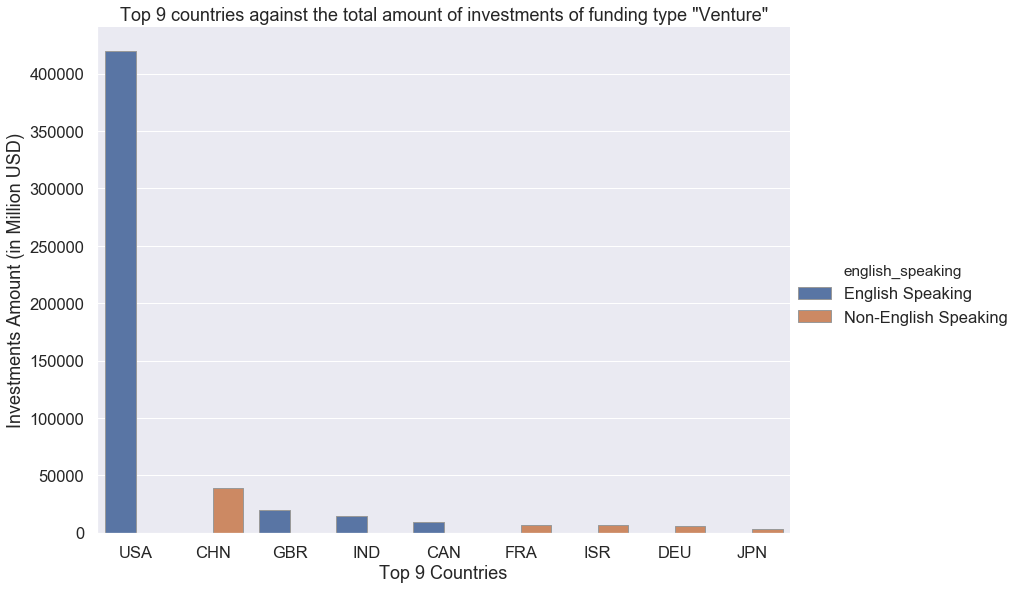

In [120]:
#Plotting top 9 english speaking countries based on total amount of investments for "Venture" Funding Type
sns.catplot('country_code','raised_amount_usd',data=top9,kind='bar',hue='english_speaking', edgecolor=".6",height=8.27, aspect=11.7/8.27)

#plot cosmetics
plt.ylabel('Investments Amount (in Million USD)')
plt.xlabel('Top 9 Countries')
plt.title('Top 9 countries against the total amount of investments of funding type "Venture"')
plt.show()



Based on the plot above __USA, GBR and IND__ are the top 3 English Speaking Countries

<a id=section903></a>
### 9.3 Plot 3

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [121]:
#Finding top 3 sectors from top 3 english speaking countries based on total count of investments
D1_3=D1[['country_code','main_sector','Total_count']].drop_duplicates().sort_values(by='Total_count',ascending=False).head(3)
D2_3=D2[['country_code','main_sector','Total_count']].drop_duplicates().sort_values(by='Total_count',ascending=False).head(3)
D3_3=D3[['country_code','main_sector','Total_count']].drop_duplicates().sort_values(by='Total_count',ascending=False).head(3)


In [122]:
#Merging results from the 3 DataFrames
frames = [D1_3, D2_3, D3_3]
D_final = pd.concat(frames)

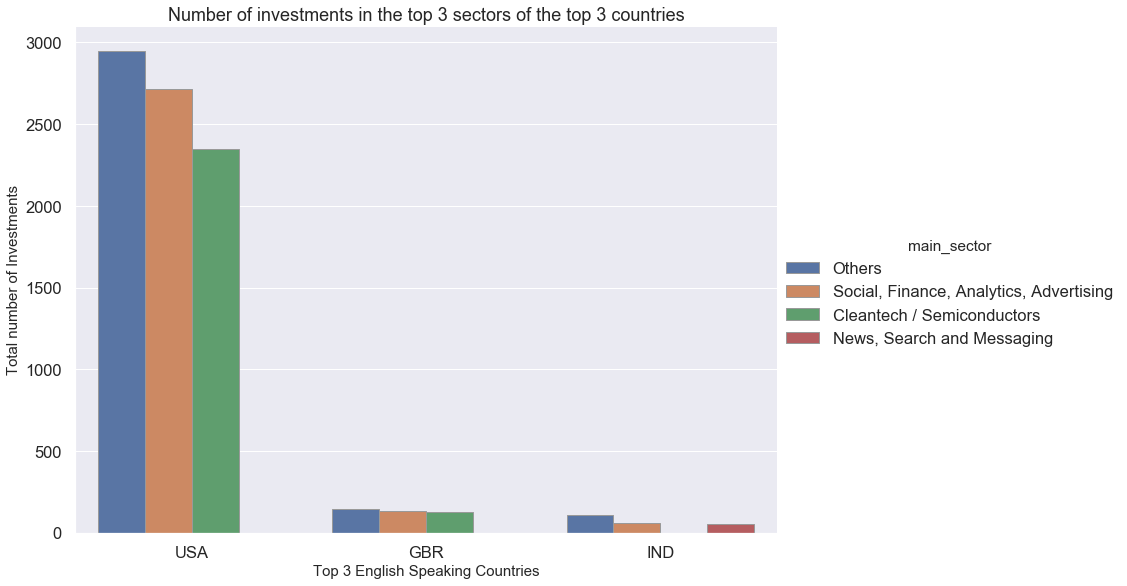

In [123]:
#Plot showing the number of investments in the top 3 sectors of the top 3 countries for "Venture" type FT

sns.catplot('country_code','Total_count',hue='main_sector',data=D_final,kind='bar', col_order='Total_count',edgecolor=".6",height=8.27, aspect=11.7/8.27)
plt.ylabel('Total number of Investments',fontsize=15)
plt.xlabel('Top 3 English Speaking Countries',fontsize=15)
plt.title('Number of investments in the top 3 sectors of the top 3 countries',fontsize=18)
plt.show()


- Based on the above plot, __"Others"__ and __"Social, Finance, Analytics, Advertising"__ sectors are the top 2 sectors in the top 3 English Speaking Countries (___USA, GBR and IND___)
- __"Cleantech / Semiconductors"__ is the 3rd best sector in __USA__ and __GBR__ whereas __"News, Search and Messaging"__ is the 3rd best sector in __IND__.

<a id=section10></a>
## 10. Conclusion

Now lets look back at the problem statments and answers which needs to be provided to the Spark Funds.
<br>
- Essentially, the CEO of Spark Funds wants to observe and understand the global trends in investment and understand the following:

  - To identify the suitable investment type for Spark Funds for a range of 5M to 15M USD per investment.
  - To identify the best English Speaking Countries the investment can be made.
  - To identify the best Sectors in the top English Speaking Countries.

#### Based on the EDA covered above, we can conclude the below:
- The suitable investment identified was __"Venture"__ Funding Type among the various Funding Type options such as Angel, Seed, Private Equity and Venture.
- The top 3 English Speaking Countries identified suitable for investing for "Venture" Funding Type are __United States, United Kingdom__ and __India__.
- Across top 3 English Countries, __"Others"__ and __"Social, Finance, Analytics, Advertising"__ sectors are the top 2 sectors.
- __"Cleantech / Semiconductors"__ is the third best sector in United States and United Kingdom whereas __"News, Search and Messaging"__ is the third best sector in India.